SGD Model with Linear regression which logs weights after half of iterations

In [1]:
#import
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_diabetes
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split
print("DONE")

DONE


In [2]:
#data loading and preprocessing
diabetes_data=pd.DataFrame(load_diabetes().data,columns=load_diabetes().feature_names)
Y=load_diabetes().target
X=load_diabetes().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [16]:
#Standardising
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [17]:
#visualising
diabetes_data.head(3)
print(X.shape)
print(Y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(442, 10)
(442,)
(309, 10)
(133, 10)
(309,)
(133,)


In [18]:
train_data=pd.DataFrame(x_train,columns=load_diabetes().feature_names)
train_data['Output']=y_train
train_data.head(3)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Output
0,0.887249,1.049781,0.402089,1.210502,-0.077052,-0.020211,-0.617040,-0.011109,0.715123,0.205189,178.0
1,-0.929383,-0.952579,-1.021087,-0.443706,0.042143,-0.312586,1.386315,-0.838291,-0.473037,0.474227,111.0
2,0.281705,1.049781,-0.433744,-0.084095,0.876507,1.190083,-0.154728,0.816072,-0.055962,-0.153529,111.0


In [24]:
train_losses = []
model_w = []
model_b = []
def CustomSGD(train_data, learning_rate, n_iter, k, divideby, init_w=None, init_b=0):
    if init_w is None:
        w = np.zeros(shape=(1, train_data.shape[1]-1))
    else:
        w = init_w
    w_gradient = w
    if init_b is None:
        b = 0
    else:
        b_gradient = init_b
    cur_iter = 1
    while cur_iter <= n_iter: 
        temp = train_data.sample(k)
        y = np.array(temp['Output'])
        x = np.array(temp.drop('Output', axis=1))
        w_gradient = np.zeros(shape=(1, train_data.shape[1]-1))
        b_gradient = 0
        for i in range(k):
            prediction = np.dot(w, x[i]) + b
            w_gradient = w_gradient + (-2) * x[i] * (y[i] - prediction)
            b_gradient = b_gradient + (-2) * (y[i] - prediction)
        w = w - learning_rate * (w_gradient / k)
        b = b - learning_rate * (b_gradient / k)
        
        if cur_iter % 10 == 0:
            train_loss = 0
            for i in range(k):
                train_loss = train_loss + ((y[i] - np.dot(w, x[i]) - b) ** 2)
            print("Loss after", cur_iter, ":", train_loss, "w:", w, "b:", b)
            if cur_iter > 0.5 * n_iter:
                train_losses.append(train_loss)
                model_w.append(w)
                model_b.append(b)
            cur_iter = cur_iter + 1
            learning_rate = learning_rate / divideby    
    return w, b

In [25]:
#Predict Function
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=(np.dot(w,x[i])+b)
        y=y.item()
        y_pred.append(y)
    return np.array(y_pred)

Loss after 10 : [198101.2439967] w: [[ 3.46372066  0.30662133 -1.62355887  2.10528917  3.39906675  1.99829706
  -0.64442362  1.98559232  6.20652835  2.35187096]] b: [25.79705145]
Loss after 20 : [63495.79577845] w: [[ 2.66073058  0.18034132  6.97204059  8.92795719  5.16264731  3.20536493
  -2.89934236  6.73105737 10.98977091  4.7547053 ]] b: [48.81167099]
Loss after 30 : [88664.77748147] w: [[ 0.11015977 -0.5930275  10.21576859 12.20499588  3.54515269  0.8637492
  -0.50503168  4.09623373 10.24667278  3.11099738]] b: [67.44812594]
Loss after 40 : [83747.30127694] w: [[ 1.73923282 -1.61938567 11.98345939 12.00465533  4.62555416  0.85274466
  -2.00516628  4.97680629 15.04795233  3.49936136]] b: [81.54932525]
Loss after 50 : [53716.4656356] w: [[ 1.73454109 -3.49327559 12.28407153 12.11572462  1.98544565 -1.05000793
  -2.49973876  4.30164808 14.02583762  3.98528472]] b: [94.01482572]
Loss after 60 : [27953.3988319] w: [[ 2.45226744 -4.32436254 15.96921375 14.86577303  3.55795433 -1.1419072

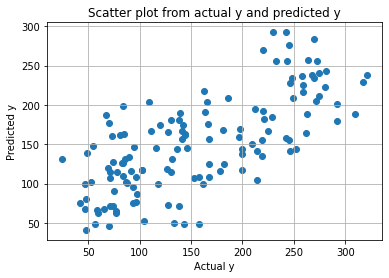

Mean Squared Error : 3042.2495511881316


In [22]:
w,b = CustomSGD(train_data, learning_rate=0.01, n_iter=1000, k=10, divideby=1, init_w=None, init_b=None)
print(w, b)

y_pred_customsgd=predict(x_test,w,b)

plt.scatter(y_test,y_pred_customsgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(model_weights)

# Plot the data in the reduced-dimensional space after PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='red', marker='o', edgecolors='k', alpha=0.8)
plt.title('Data after PCA (2D Projection)')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (1000, 2, 1) + inhomogeneous part.